In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
import seaborn as sns
# можно и так: import seaborn as sb
from scipy.stats import norm
from scipy import stats
from pandas import DataFrame
%matplotlib inline

In [2]:
pd.set_option('display.max_columns', 100)
df = pd.read_csv('data\howpop_train.csv', delimiter=",")
df.head()

<>:2: SyntaxWarning: invalid escape sequence '\h'
<>:2: SyntaxWarning: invalid escape sequence '\h'
C:\Users\User\AppData\Local\Temp\ipykernel_16136\463394359.py:2: SyntaxWarning: invalid escape sequence '\h'
  df = pd.read_csv('data\howpop_train.csv', delimiter=",")


,url,domain,post_id,published,author,flow,polling,content_len,title,comments,favs,views,votes_plus,votes_minus,views_lognorm,favs_lognorm,comments_lognorm
0,https://habrahabr.ru/post/18284/,habrahabr.ru,18284,2008-01-01 18:19:00,@Tapac,develop,False,4305,Новогодний подарок блоггерам — WordPress 2.3.2,0,0,236,0.0,0.0,-0.792687,-1.344075,-2.436871
1,https://habrahabr.ru/post/18285/,habrahabr.ru,18285,2008-01-01 18:30:00,@DezmASter,design,False,7344,"Сумасшедшие яйца, или сервис для отслеживания ...",1,1,353,1.0,0.0,-0.485214,-0.831946,-1.873193
2,https://habrahabr.ru/post/18286/,habrahabr.ru,18286,2008-01-01 18:34:00,@DezmASter,design,False,8431,"Сумасшедшие яйца, или сервис для отслеживания ...",47,72,1200,45.0,5.0,0.446090,1.794023,0.574656
3,https://habrahabr.ru/post/18291/,habrahabr.ru,18291,2008-01-02 01:32:00,@Taoorus,design,False,5662,"Сглаживание шрифтов, и субпиксельная отрисовка",102,36,5700,72.0,3.0,1.627469,1.300050,1.167375
4,https://geektimes.ru/post/18294/,geektimes.ru,18294,2008-01-02 14:34:00,@dennydo,NaN,False,3706,Почему мне не нравится iPhone,230,6,1400,73.0,15.0,1.362397,0.961094,2.020356


In [3]:
df.drop(
 filter(lambda c: c.endswith("_lognorm"), df.columns),
 axis=1, # axis = 1: столбцы
 inplace=True,
) # избавляет от необходимости сохранять датасет

In [4]:
df.head()

,url,domain,post_id,published,author,flow,polling,content_len,title,comments,favs,views,votes_plus,votes_minus
0,https://habrahabr.ru/post/18284/,habrahabr.ru,18284,2008-01-01 18:19:00,@Tapac,develop,False,4305,Новогодний подарок блоггерам — WordPress 2.3.2,0,0,236,0.0,0.0
1,https://habrahabr.ru/post/18285/,habrahabr.ru,18285,2008-01-01 18:30:00,@DezmASter,design,False,7344,"Сумасшедшие яйца, или сервис для отслеживания ...",1,1,353,1.0,0.0
2,https://habrahabr.ru/post/18286/,habrahabr.ru,18286,2008-01-01 18:34:00,@DezmASter,design,False,8431,"Сумасшедшие яйца, или сервис для отслеживания ...",47,72,1200,45.0,5.0
3,https://habrahabr.ru/post/18291/,habrahabr.ru,18291,2008-01-02 01:32:00,@Taoorus,design,False,5662,"Сглаживание шрифтов, и субпиксельная отрисовка",102,36,5700,72.0,3.0
4,https://geektimes.ru/post/18294/,geektimes.ru,18294,2008-01-02 14:34:00,@dennydo,NaN,False,3706,Почему мне не нравится iPhone,230,6,1400,73.0,15.0


In [5]:
df["published"] = pd.to_datetime(df.published, yearfirst=True)

In [6]:
df["year"] = [d.year for d in df.published]
df["month"] = [d.month for d in df.published]
df["dayofweek"] = [d.isoweekday() for d in df.published]
df["hour"] = [d.hour for d in df.published]

In [7]:
df.head()

,url,domain,post_id,published,author,flow,polling,content_len,title,comments,favs,views,votes_plus,votes_minus,year,month,dayofweek,hour
0,https://habrahabr.ru/post/18284/,habrahabr.ru,18284,2008-01-01 18:19:00,@Tapac,develop,False,4305,Новогодний подарок блоггерам — WordPress 2.3.2,0,0,236,0.0,0.0,2008,1,2,18
1,https://habrahabr.ru/post/18285/,habrahabr.ru,18285,2008-01-01 18:30:00,@DezmASter,design,False,7344,"Сумасшедшие яйца, или сервис для отслеживания ...",1,1,353,1.0,0.0,2008,1,2,18
2,https://habrahabr.ru/post/18286/,habrahabr.ru,18286,2008-01-01 18:34:00,@DezmASter,design,False,8431,"Сумасшедшие яйца, или сервис для отслеживания ...",47,72,1200,45.0,5.0,2008,1,2,18
3,https://habrahabr.ru/post/18291/,habrahabr.ru,18291,2008-01-02 01:32:00,@Taoorus,design,False,5662,"Сглаживание шрифтов, и субпиксельная отрисовка",102,36,5700,72.0,3.0,2008,1,3,1
4,https://geektimes.ru/post/18294/,geektimes.ru,18294,2008-01-02 14:34:00,@dennydo,NaN,False,3706,Почему мне не нравится iPhone,230,6,1400,73.0,15.0,2008,1,3,14


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  100,
  101,
  102,
  103,
  104,
  105],
 [Text(0, 0, '2008-1'),
  Text(1, 0, '2008-2'),
  Text(2, 0, '2008-3'),
  Text(3, 0, '2008-4'),
  Text(4, 0, '2008-5'),
  Text(5, 0, '2008-6'),
  Text(6, 0, '2008-7'),
  Text(7, 0, '2008-8'),
  Text(8, 0, '2008-9'),
  Text(9, 0, '2008-10'),
  Text(10, 0, '2008-11'),
  Text(11, 0, '2008-12'),
  Text(12, 0, '2009-1'),
  Text(13, 0, '2009-2'),
  Text(14, 0, '2009-3'),

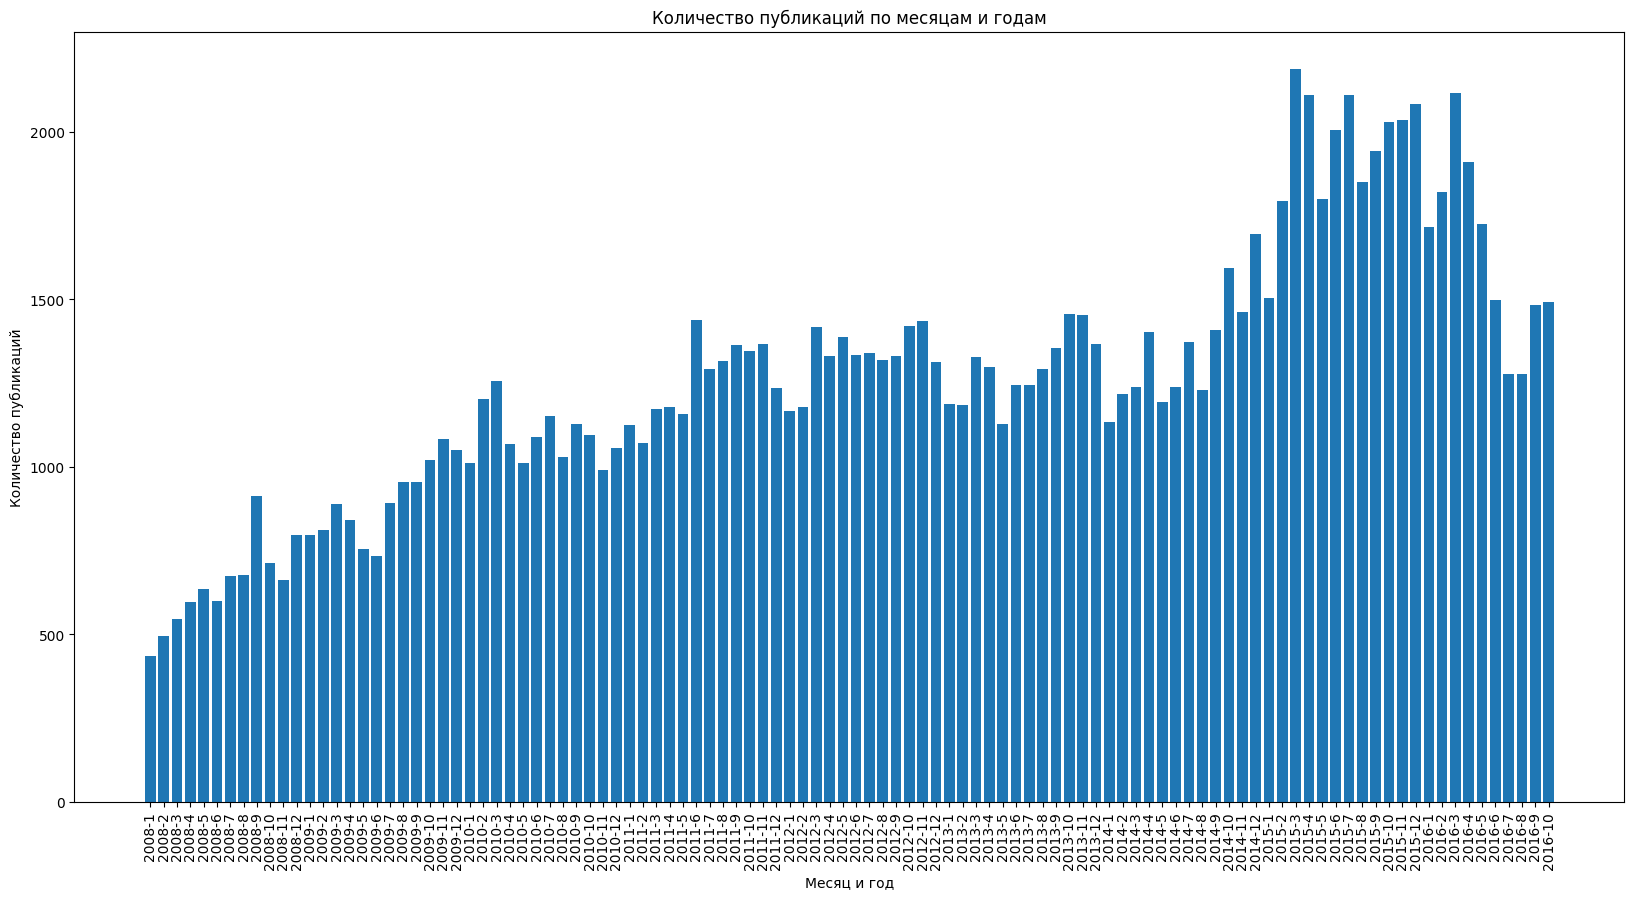

In [13]:
monthly_counts = df.groupby(['year', 'month']).size().reset_index(name='count')

plt.figure(figsize=(20, 10))
plt.bar(monthly_counts['year'].astype(str) + '-' + monthly_counts['month'].astype(str), monthly_counts['count'])
plt.xlabel('Месяц и год')
plt.ylabel('Количество публикаций')
plt.title('Количество публикаций по месяцам и годам')
plt.xticks(rotation=90)

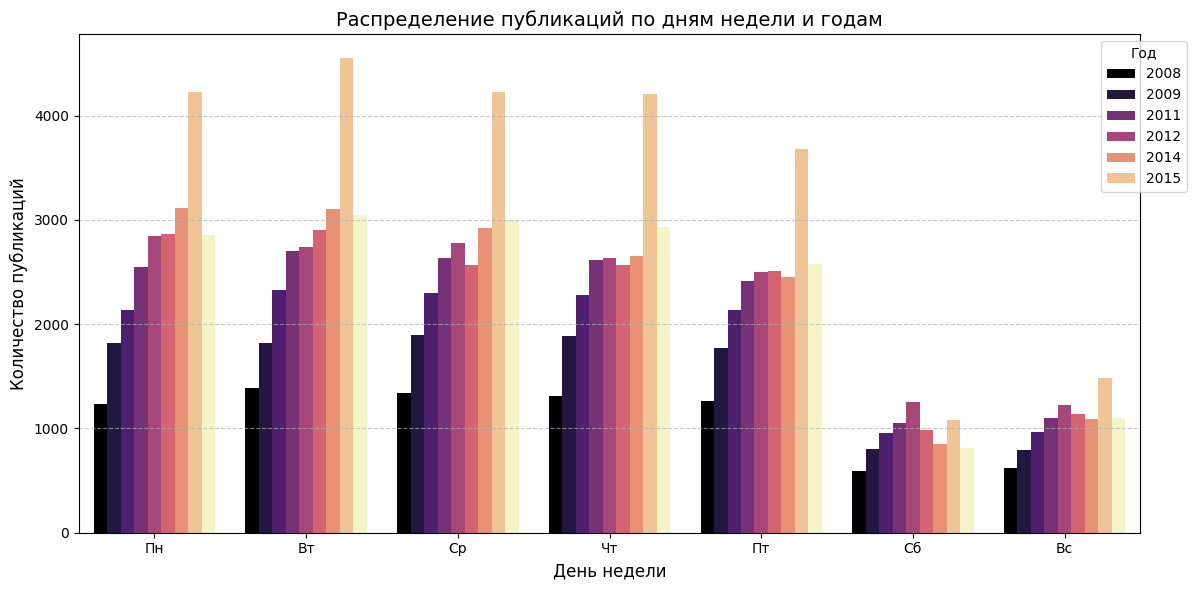

In [29]:
days = {1: 'Пн', 2: 'Вт', 3: 'Ср', 4: 'Чт', 5: 'Пт', 6: 'Сб', 7: 'Вс'}

df['day_name'] = df['dayofweek'].map(days)

grouped = df.groupby(['day_name', 'year'])['post_id'].count().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(
    x='day_name',
    y='post_id',
    hue='year',
    data=grouped,
    order=['Пн', 'Вт', 'Ср', 'Чт', 'Пт', 'Сб', 'Вс'],
    palette='magma'
)

plt.title('Распределение публикаций по дням недели и годам', fontsize=14)
plt.xlabel('День недели', fontsize=12)
plt.ylabel('Количество публикаций', fontsize=12)
plt.legend(title='Год', bbox_to_anchor=(1.05, 1))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

**Визуализация**

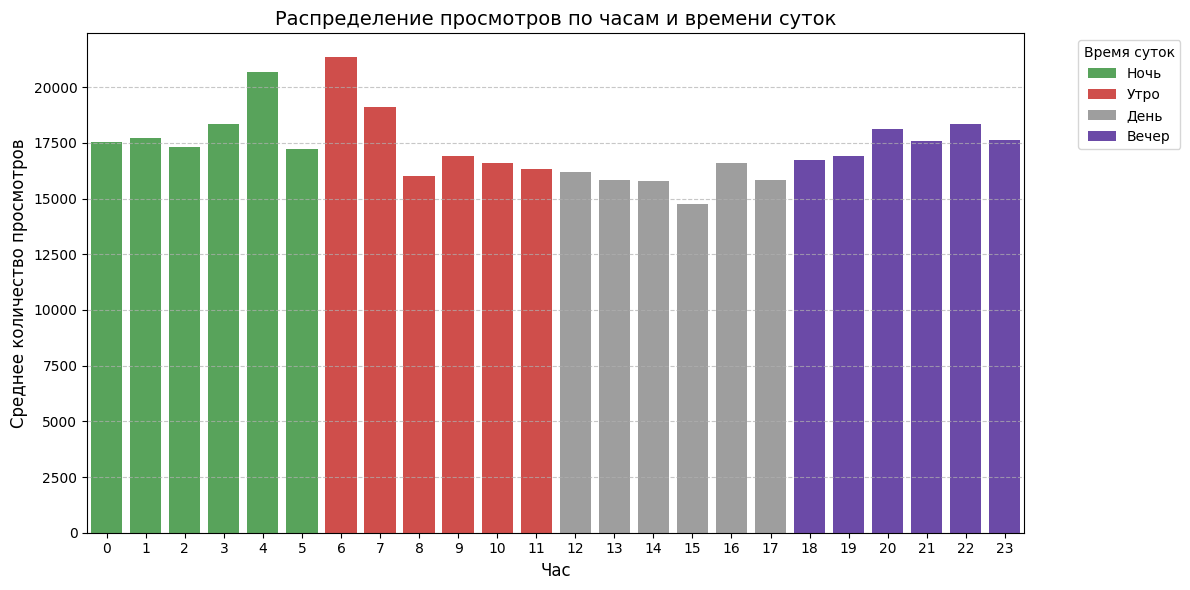

In [ ]:
df['views'] = pd.to_numeric(df['views'], errors='coerce')

df.dropna(subset=['views'], inplace=True)

df['time_of_day'] = 'День'
df.loc[df['hour'].between(6, 11, inclusive='both'), 'time_of_day'] = 'Утро'
df.loc[df['hour'].between(12, 17, inclusive='both'), 'time_of_day'] = 'День'
df.loc[df['hour'].between(18, 23, inclusive='both'), 'time_of_day'] = 'Вечер'
df.loc[df['hour'].between(0, 5, inclusive='both'), 'time_of_day'] = 'Ночь'

views_by_hour = df.groupby(["hour", "time_of_day"])["views"].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(
    x='hour',
    y='views',
    hue='time_of_day',
    data=views_by_hour,
    order=list(range(0, 24)),
    palette='plasma'
)

plt.title('Распределение просмотров по часам и времени суток', fontsize=14)
plt.xlabel('Час', fontsize=12)
plt.ylabel('Среднее количество просмотров', fontsize=12)
plt.legend(title='Время суток', bbox_to_anchor=(1.05, 1))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

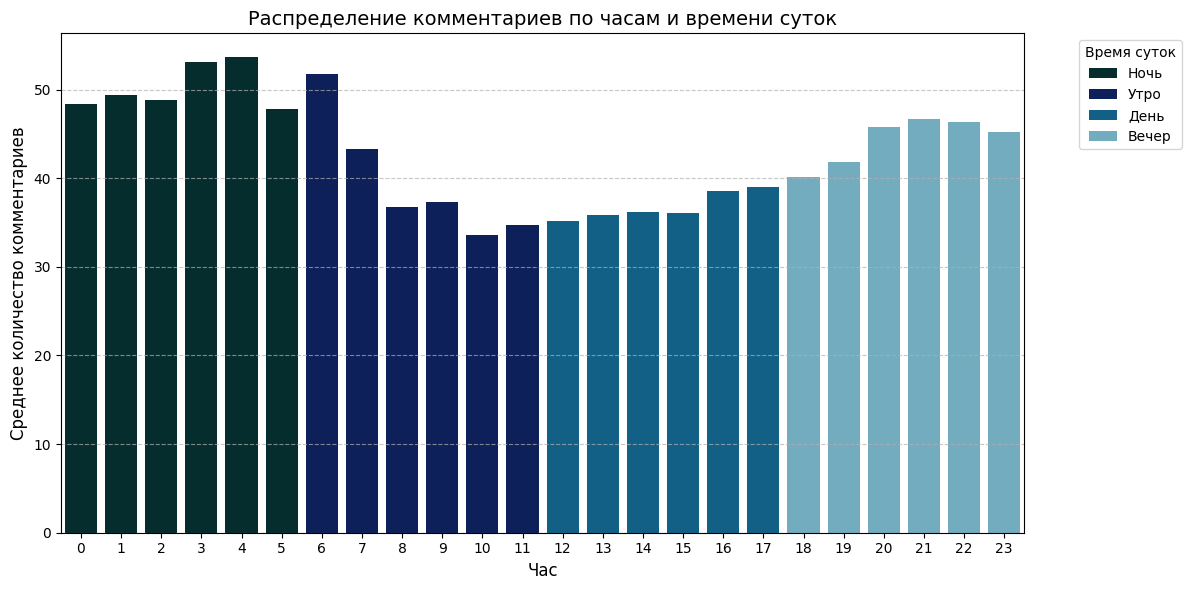

In [20]:
df['comments'] = pd.to_numeric(df['comments'], errors='coerce')

df.dropna(subset=['comments'], inplace=True)

df['time_of_day'] = 'День'
df.loc[df['hour'].between(6, 11, inclusive='both'), 'time_of_day'] = 'Утро'
df.loc[df['hour'].between(12, 17, inclusive='both'), 'time_of_day'] = 'День'
df.loc[df['hour'].between(18, 23, inclusive='both'), 'time_of_day'] = 'Вечер'
df.loc[df['hour'].between(0, 5, inclusive='both'), 'time_of_day'] = 'Ночь'

views_by_hour = df.groupby(["hour", "time_of_day"])["comments"].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(
    x='hour',
    y='comments',
    hue='time_of_day',
    data=views_by_hour,
    order=list(range(0, 24)),
    palette='ocean'
)

plt.title('Распределение комментариев по часам и времени суток', fontsize=14)
plt.xlabel('Час', fontsize=12)
plt.ylabel('Среднее количество комментариев', fontsize=12)
plt.legend(title='Время суток', bbox_to_anchor=(1.05, 1))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

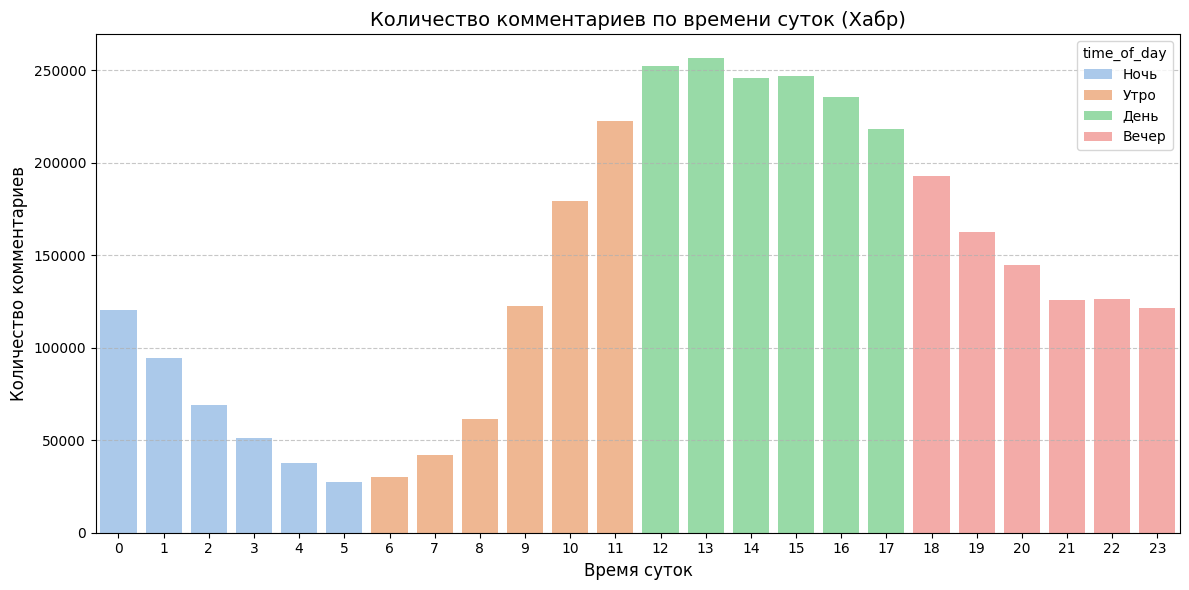

In [ ]:
df['published'] = pd.to_datetime(df['published'])

df['hour'] = df['published'].dt.hour
df['time_of_day'] = 'День'
df.loc[df['hour'].between(6, 11, inclusive='both'), 'time_of_day'] = 'Утро'
df.loc[df['hour'].between(12, 17, inclusive='both'), 'time_of_day'] = 'День'
df.loc[df['hour'].between(18, 23, inclusive='both'), 'time_of_day'] = 'Вечер'
df.loc[df['hour'].between(0, 5, inclusive='both'), 'time_of_day'] = 'Ночь'

comments_by_time_of_day = df[df['domain'] == 'habrahabr.ru'].groupby(["hour", "time_of_day"])["comments"].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(
    x='hour',
    y='comments',
    hue='time_of_day',
    data=comments_by_time_of_day,
    palette='pastel'
)
plt.title('Количество комментариев по времени суток (Хабр)', fontsize=14)
plt.xlabel('Время суток', fontsize=12)
plt.ylabel('Количество комментариев', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

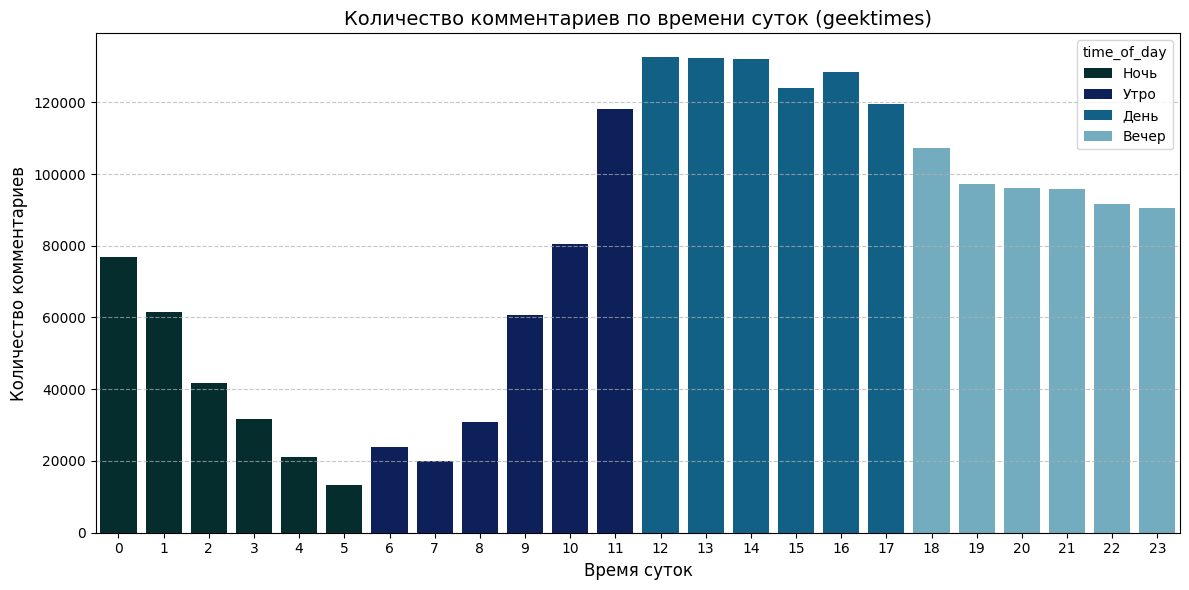

In [28]:
df['published'] = pd.to_datetime(df['published'])

df['hour'] = df['published'].dt.hour
df['time_of_day'] = 'День'
df.loc[df['hour'].between(6, 11, inclusive='both'), 'time_of_day'] = 'Утро'
df.loc[df['hour'].between(12, 17, inclusive='both'), 'time_of_day'] = 'День'
df.loc[df['hour'].between(18, 23, inclusive='both'), 'time_of_day'] = 'Вечер'
df.loc[df['hour'].between(0, 5, inclusive='both'), 'time_of_day'] = 'Ночь'

comments_by_time_of_day = df[df['domain'] == 'geektimes.ru'].groupby(["hour", "time_of_day"])["comments"].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(
    x='hour',
    y='comments',
    hue='time_of_day',
    data=comments_by_time_of_day,
    palette='ocean'
)
plt.title('Количество комментариев по времени суток (geektimes)', fontsize=14)
plt.xlabel('Время суток', fontsize=12)
plt.ylabel('Количество комментариев', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

**Утверждение**

1. Больше всего просмотров набирают статьи, опубликованные в 12 часов дня **Нет**
2. У опубликованных в 10 утра постов больше всего комментариев **Нет**
3. Больше всего просмотров набирают статьи, опубликованные в 6 часов утра **Да**
4. Максимальное число комментариев на гиктаймсе набрала статья,
   опубликованная в 9 часов вечера **Нет**
5. На хабре дневные статьи комментируют чаще, чем вечерние **Да**

C:\Users\User\AppData\Local\Temp\ipykernel_16136\1240491052.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


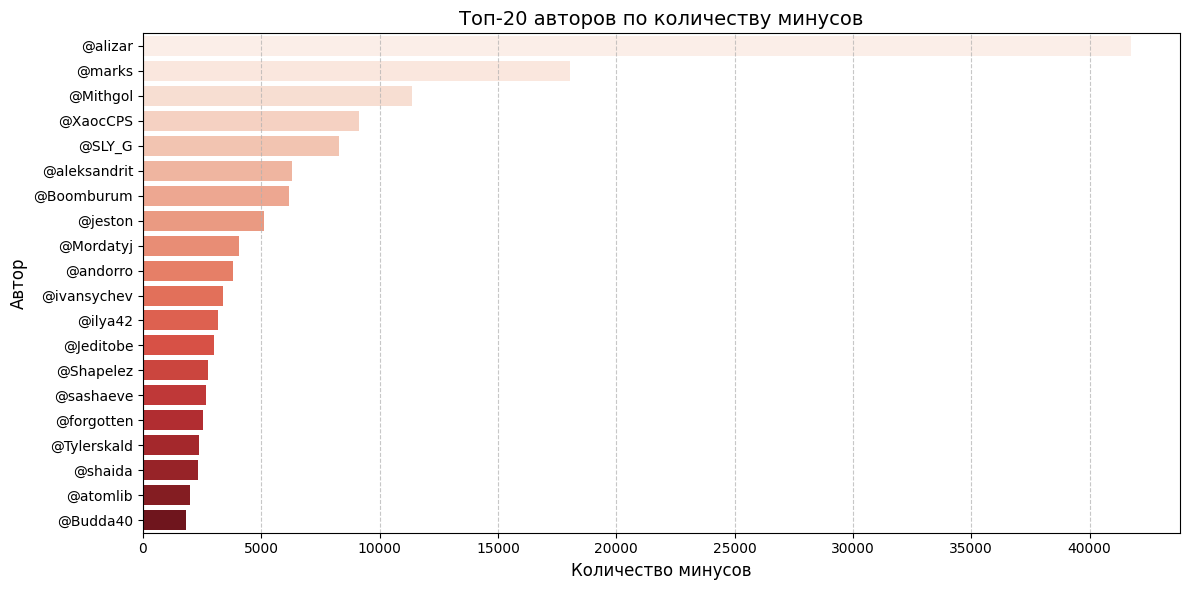

In [34]:
author_votes = df.groupby('author')['votes_minus'].sum().reset_index()

top_authors = author_votes.sort_values(by='votes_minus', ascending=False).head(20)

plt.figure(figsize=(12, 6))
sns.barplot(
    x='votes_minus',
    y='author',
    data=top_authors,
    palette='Reds'
)
plt.title('Топ-20 авторов по количеству минусов', fontsize=14)
plt.xlabel('Количество минусов', fontsize=12)
plt.ylabel('Автор', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Ответ: alizar

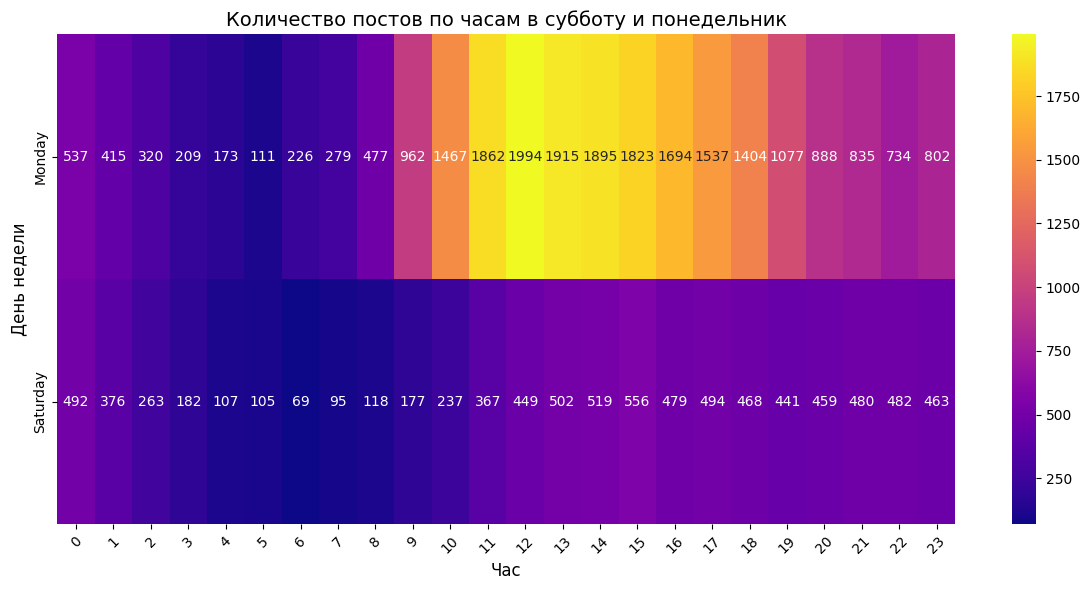

In [ ]:
df['published'] = pd.to_datetime(df['published'])

df['day_of_week'] = df['published'].dt.day_name()
df['hour'] = df['published'].dt.hour

filtered_df = df[df['day_of_week'].isin(['Saturday', 'Monday'])]

posts_by_hour = filtered_df.groupby(['day_of_week', 'hour']).size().unstack(fill_value=0)

plt.figure(figsize=(12, 6))
sns.heatmap(posts_by_hour, cmap='plasma', annot=True, fmt='d')
plt.title('Количество постов по часам в субботу и понедельник', fontsize=14)
plt.xlabel('Час', fontsize=12)
plt.ylabel('День недели', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()

Ответ: В субботу, и в понедельник - чаще пишут днем